In [49]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import silhouette_samples, silhouette_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab as pl

# df_train_test = pd.concat([df_train.set_index('Trap'),df_train.set_index('Trap')], axis=1, join='inner')
# df_train_weather = pd.merge(df_train,df_weather,on='Date',how='inner')

df_train = pd.read_csv('../Dream-Team-DSI-5_data/train.csv')
df_spray = pd.read_csv('../Dream-Team-DSI-5_data/spray.csv')
df_weather = pd.read_csv('../Dream-Team-DSI-5_data/weather.csv')
df_test = pd.read_csv('../Dream-Team-DSI-5_data/test.csv')
df_train_weather_2 = pd.read_csv('../Dream-Team-DSI-5_data/train_weather.csv')
df_test_weather_2c = pd.read_csv('../Dream-Team-DSI-5_data/test_weather2c.csv')

In [50]:
df_train_weather_2.shape

(4616, 27)

In [51]:
df_test_weather_2c.shape

(116293, 33)

In [20]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df_test_weather_2b)

missing values 
Id                        0
Date                      0
Trap                      0
CULEX ERRATICUS           0
CULEX PIPIENS             0
CULEX PIPIENS/RESTUANS    0
CULEX RESTUANS            0
CULEX SALINARIUS          0
CULEX TARSALIS            0
CULEX TERRITANS           0
UNSPECIFIED CULEX         0
date                      0
tmax                      0
tmin                      0
tavg                      0
depart                    0
dewpoint                  0
wetbulb                   0
heat                      0
cool                      0
preciptotal               0
stnpressure               0
sealevel                  0
resultspeed               0
resultdir                 0
avgspeed                  0
year                      0
coollast7                 0
coollast30                0
coollast90                0
preciplast7               0
preciplast30              0
preciplast90              0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=14155

In [45]:
## HOW MANY ROWS in DF_TEST CONTAIN INFO FROM DATE 2008-06-11?

df1 = df_test[df_test['Date'] == '2008-06-11']
print df1

        Id        Date                                            Address  \
0        1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1        2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2        3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3        4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4        5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
5        6  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
6        7  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
7        8  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
8        9  2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   
9       10  2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   
10      11  2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   
11      12  2008-06-11  6200 North Mandell Avenue, Chicago, IL 60646, USA   

In [46]:
## HOW MANY ROWS in DF_TEST_WEATHER_2B CONTAIN INFO FROM DATE 2008-06-11?

df2 = df_test_weather_2c[df_test_weather_2c['Date'] == '2008-06-11']
print df2

        Id        Date   Trap  CULEX ERRATICUS  CULEX PIPIENS  \
0      353  2008-06-11   T001                0              0   
1      354  2008-06-11   T001                0              0   
2      355  2008-06-11   T001                0              1   
3      356  2008-06-11   T001                0              0   
4      357  2008-06-11   T001                0              0   
5      358  2008-06-11   T001                0              0   
6      359  2008-06-11   T001                0              0   
7      360  2008-06-11   T001                1              0   
8        1  2008-06-11   T002                0              0   
9        2  2008-06-11   T002                0              0   
10       3  2008-06-11   T002                0              1   
11       4  2008-06-11   T002                0              0   
12       5  2008-06-11   T002                0              0   
13       6  2008-06-11   T002                0              0   
14       7  2008-06-11   

In [15]:
df_test.shape

(116293, 11)

In [38]:
df1.shape

(1208, 11)

In [16]:
df_weather.shape

(2944, 22)

In [19]:
df_weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [7]:
list(df_train_weather_2)

['Date',
 'Trap',
 'NumMosquitos',
 'WnvPresent',
 'Year',
 'DayofYear',
 'CULEX ERRATICUS',
 'CULEX PIPIENS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX SALINARIUS',
 'CULEX TARSALIS',
 'CULEX TERRITANS',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed']

In [8]:
list(df_train)

['Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'Trap',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'WnvPresent']

In [9]:
list(df_test)

['Id',
 'Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'Trap',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy']

In [30]:
df_train_weather_2.head(5)

,Date,Trap,NumMosquitos,WnvPresent,Year,DayofYear,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,...,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-29,T002,2,0,2007,149,0,0,1,1,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,T007,1,0,2007,149,0,0,0,1,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,T015,5,0,2007,149,0,0,1,1,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,T045,2,0,2007,149,0,0,0,1,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,T046,1,0,2007,149,0,0,0,1,...,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4c4e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122027390>]], dtype=object)

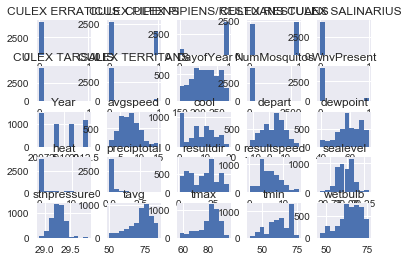

In [43]:
df_train_weather_2.hist()

In [32]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(df_train_weather_2)

missing values 
Date                      0
Trap                      0
NumMosquitos              0
WnvPresent                0
Year                      0
DayofYear                 0
CULEX ERRATICUS           0
CULEX PIPIENS             0
CULEX PIPIENS/RESTUANS    0
CULEX RESTUANS            0
CULEX SALINARIUS          0
CULEX TARSALIS            0
CULEX TERRITANS           0
tmax                      0
tmin                      0
tavg                      0
depart                    0
dewpoint                  0
wetbulb                   0
heat                      0
cool                      0
preciptotal               0
stnpressure               0
sealevel                  0
resultspeed               0
resultdir                 0
avgspeed                  0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=4616, step=1)
dataframe types 
Date                       object
Trap                       object
NumMosquitos                int64
WnvPresent                  int64
Year  

In [41]:
# The formula says that the presence of West Nile Virus (wnv) (coded as 1 or 0) DEPENDS on (~) the following attributes:  
# Yea, Day of Year, tavg, dewpoint, wetbulb, stnpressure, and sealevel.

model = smf.logit(
    "WnvPresent ~ NumMosquitos + Year + DayofYear + tavg + dewpoint + wetbulb + stnpressure + sealevel",
    data = df_train_weather_2
).fit()


Optimization terminated successfully.
         Current function value: 0.239334
         Iterations 9


In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WnvPresent   No. Observations:                 4616
Model:                          Logit   Df Residuals:                     4607
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Aug 2017   Pseudo R-squ.:                  0.1661
Time:                        07:54:15   Log-Likelihood:                -1104.8
converged:                       True   LL-Null:                       -1324.8
                                        LLR p-value:                 4.797e-90
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -354.5737     51.811     -6.844      0.000    -456.121    -253.026
NumMosquitos     0.0080      0.001     10.542      0.000       0.007       0.010
Year             0.1484      0.024      6.189      0.000       0.101       0.195
DayofYear        0.0240      0.002     10.162      0.000       0.019       0.029
tavg             0.0593      0.045      1.319      0.187      -0.029       0.147
dewpoint         0.1472      0.066      2.221      0.026       0.017       0.277
wetbulb         -0.1243      0.115     -1.077      0.282      -0.351       0.102
stnpressure     -0.2010      2.404     -0.084      0.933      -4.914       4.512
sealevel         1.6306      2.491      0.655      0.513      -3.252       6.513
================================================================================
"""

In [36]:
import math

In [37]:
math.exp(0.0082)

## As the number of mosquitos increase by 1 unit, we expect that a WNV is 1.008 times *AS* likely to be present.
## 1.008 is the ODDS RATIO associating number of mosquitos to the presence of WNV.

## e ^ 0.0082 is the ODDS RATIO
## 0.0082 is the LOG-ODDS RATIO

1.0082337120833602

In [40]:
math.exp(0.0180)

## As the day of year advances by a day, we expect that WNV is 1.018 times *AS* likely to be present.
## 1.018 is the ODDS RATIO associating number of mosquitos to the presence of WNV.

## e ^ 0.0180 is the ODDS RATIO
## 0.0180 is the LOG-ODDS RATIO

1.0181629763897937

In [82]:
## LOG MODEL WITHOUT DAY OF YEAR and YEAR VARIABLES

model = smf.logit(
    "WnvPresent ~ NumMosquitos + tavg + dewpoint + wetbulb + stnpressure + sealevel",
    data = df_train_weather_2
).fit()

Optimization terminated successfully.
         Current function value: 0.254574
         Iterations 10


In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WnvPresent   No. Observations:                 4616
Model:                          Logit   Df Residuals:                     4609
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Aug 2017   Pseudo R-squ.:                  0.1130
Time:                        23:44:12   Log-Likelihood:                -1175.1
converged:                       True   LL-Null:                       -1324.8
                                        LLR p-value:                 1.077e-61
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -102.0672     18.536     -5.506      0.000    -138.398     -65.737
NumMosquitos     0.0071      0.001     10.170      0.000       0.006       0.008
tavg             0.0355      0.042      0.854      0.393      -0.046       0.117
dewpoint         0.1488      0.059      2.508      0.012       0.033       0.265
wetbulb         -0.1111      0.104     -1.069      0.285      -0.315       0.093
stnpressure     -3.2357      3.173     -1.020      0.308      -9.455       2.984
sealevel         6.3294      3.198      1.979      0.048       0.062      12.597
================================================================================
"""

In [84]:
print model.conf_int()

                       0          1
Intercept    -138.397595 -65.736745
NumMosquitos    0.005725   0.008459
tavg           -0.045943   0.116855
dewpoint        0.032500   0.265112
wetbulb        -0.314743   0.092556
stnpressure    -9.455407   2.983984
sealevel        0.062124  12.596669


In [62]:
## LOG MODEL WITHOUT STNPRESSURE and SEALEVEL

model = smf.logit(
    "WnvPresent ~ DayofYear + dewpoint",
    data = df_train_weather_2
).fit(method='bfgs')

# model = smf.logit(
#     "WnvPresent ~ DayofYear + dewpoint + Trap",
#     data = df_train_weather_2
# ).fit()

Optimization terminated successfully.
         Current function value: 0.266917
         Iterations: 19
         Function evaluations: 27
         Gradient evaluations: 27


In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WnvPresent   No. Observations:                 4616
Model:                          Logit   Df Residuals:                     4613
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Aug 2017   Pseudo R-squ.:                 0.07000
Time:                        12:56:54   Log-Likelihood:                -1232.1
converged:                       True   LL-Null:                       -1324.8
                                        LLR p-value:                 5.271e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.4193      0.777    -14.701      0.000     -12.942      -9.897
DayofYear      0.0196      0.002      9.799      0.000       0.016       0.024
dewpoint       0.0756      0.008      9.427      0.000       0.060       0.091
==============================================================================
"""

In [ ]:
# #generating median salary predictions for unsalaried job postings
# predict_y = logreg.predict(predict_X)   
# predict_data["salary_prediction"] = predict_y
# predict_data.head()

model = smf.logit(
    "WnvPresent ~ DayofYear + dewpoint",
    data = df_train_weather_2
).fit(method='bfgs')

# male_logit = logit(formula = 'Male \~ Height + Weight', df = heights_weights).fit()
# print male_logit.summary()

In [69]:
day = df_train_weather_2['DayofYear']
dew = df_train_weather_2['dewpoint']

In [ ]:
lowess_line = lowess(weights, heights)

In [71]:
# heights_m = heights[heights_weights['Gender'] == 'Male'].values
# heights_f = heights[heights_weights['Gender'] == 'Female'].values

day_mosq = day[df_train_weather_2['WnvPresent'] == 1].values
day_nomosq = day[df_train_weather_2['WnvPresent'] == 0].values

dewp_mosq = dew[df_train_weather_2['WnvPresent'] == 1].values
dewp_nomosq = dew[df_train_weather_2['WnvPresent'] == 0].values


In [79]:
logit_pars = model.params
# intercept = -logit_pars['Intercept'] / logit_pars['dewpoint']
# slope = -logit_pars['DayofYear'] / logit_pars['dewpoint']

intercept = logit_pars['Intercept'] / logit_pars['dewpoint']
slope = logit_pars['DayofYear'] / logit_pars['dewpoint']

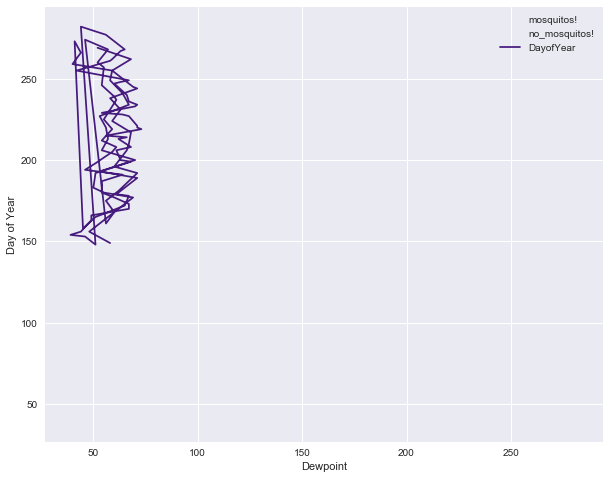

In [85]:
fig = plt.figure(figsize = (10, 8))
# NoMosq points (coral)
plt.plot(day_mosq, dewp_mosq, '.', label = 'mosquitos!',
mfc = 'None', mec='coral', alpha = .4)
# Mosq points (blue)
plt.plot(day_nomosq, dewp_nomosq, '.', label = 'no_mosquitos!',
mfc = 'None', mec='steelblue', alpha = .4)
# The separating line
#plt.plot(array([50, 80]), intercept + slope * array([50, 80]), '-', color = '#461B7E')
plt.plot(df_train_weather_2['dewpoint'], df_train_weather_2['DayofYear'], color = '#461B7E')
plt.xlabel('Dewpoint')
plt.ylabel('Day of Year')
plt.legend(loc='upper right')

In [ ]:
# city_predictions = pd.DataFrame(df_train_weather_2[["city", "salary_prediction"]])
# city_predictions['median_salary_prediction'] = city_predictions.salary_prediction.map({0:"below_median", 1:"above_median"})
# sns.countplot(x="city", hue="median_salary_prediction", data=city_predictions)
# plt.ylabel("Number of Job Postings")
# plt.xticks(rotation=45)
# sns.plt.title('Plot of Salary Predictions by City (8 variable log regression)')
# plt.show()

WNV_predictions = pd.DataFrame(predict_data[["WnvPresent", "DayofYear", "dewpoint"]])
WNV_predictions['median_salary_prediction'] = city_predictions.salary_prediction.map({0:"below_median", 1:"above_median"})
sns.countplot(x="city", hue="median_salary_prediction", data=city_predictions)
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
sns.plt.title('Plot of Salary Predictions by City (8 variable log regression)')
plt.show()


In [90]:
## CREATING DATAFRAME OF ONLY SPECIES DUMMY VARIABLES

species = ['WnvPresent', 'CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS', 'CULEX TERRITANS']
df_species = df_train_weather_2[species]

In [91]:
# RENAMING SPECIES COLUMNS

df_species.rename(columns={'CULEX ERRATICUS': 'CULEX_ERRATICUS'}, inplace=True)
df_species.rename(columns={'CULEX PIPIENS': 'CULEX_PIPIENS'}, inplace=True)
df_species.rename(columns={'CULEX PIPIENS/RESTUANS': 'CULEX_PIPIENS_RESTUANS'}, inplace=True)
df_species.rename(columns={'CULEX RESTUANS': 'CULEX_RESTUANS'}, inplace=True)
df_species.rename(columns={'CULEX SALINARIUS': 'CULEX_SALINARIUS'}, inplace=True)
df_species.rename(columns={'CULEX TARSALIS': 'CULEX_TARSALIS'}, inplace=True)
df_species.rename(columns={'CULEX TERRITANS': 'CULEX_TERRITANS'}, inplace=True)

In [92]:
df_species.head(5)

,WnvPresent,CULEX_ERRATICUS,CULEX_PIPIENS,CULEX_PIPIENS_RESTUANS,CULEX_RESTUANS,CULEX_SALINARIUS,CULEX_TARSALIS,CULEX_TERRITANS
0,0,0,0,1,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


In [93]:
df_species.sum()

WnvPresent                 385
CULEX_ERRATICUS              1
CULEX_PIPIENS             1950
CULEX_PIPIENS_RESTUANS    3826
CULEX_RESTUANS            2393
CULEX_SALINARIUS            83
CULEX_TARSALIS               6
CULEX_TERRITANS            216
dtype: int64

In [98]:
## CREATING MODEL WITH JUST SPECIES -- included only CULEX_PIPIENS, CULEX_RESTUANS, CULEX_TERRITANS, CULEX_PIPIENS_RESTUANS

model = smf.logit(
    "WnvPresent ~ CULEX_PIPIENS + CULEX_RESTUANS + CULEX_TERRITANS + CULEX_PIPIENS_RESTUANS",
    data = df_species
).fit()

# 'CULEX PIPIENS/RESTUANS' + 

Optimization terminated successfully.
         Current function value: 0.254680
         Iterations 8


In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WnvPresent   No. Observations:                 4616
Model:                          Logit   Df Residuals:                     4611
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Aug 2017   Pseudo R-squ.:                  0.1126
Time:                        09:26:00   Log-Likelihood:                -1175.6
converged:                       True   LL-Null:                       -1324.8
                                        LLR p-value:                 2.326e-63
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.9483      0.278    -17.824      0.000      -5.492      -4.404
CULEX_PIPIENS              1.7758      0.130     13.623      0.000       1.520       2.031
CULEX_RESTUANS             0.0462      0.111      0.416      0.678      -0.172       0.264
CULEX_TERRITANS           -0.0525      0.244     -0.215      0.830      -0.531       0.426
CULEX_PIPIENS_RESTUANS     1.6223      0.261      6.218      0.000       1.111       2.134
==========================================================================================
"""

In [96]:
print model.conf_int()

                        0         1
Intercept       -3.794663 -3.272049
CULEX_PIPIENS    1.540124  2.054676
CULEX_RESTUANS  -0.106178  0.330487
CULEX_TERRITANS -0.452451  0.496224


In [100]:
## CREATING MODEL WITH JUST SPECIES -- included only CULEX_PIPIENS, CULEX_RESTUANS, CULEX_TERRITANS

model = smf.logit(
    "WnvPresent ~ CULEX_PIPIENS + CULEX_RESTUANS + CULEX_TERRITANS",
    data = df_species
).fit()

# 'CULEX PIPIENS/RESTUANS' + 

Optimization terminated successfully.
         Current function value: 0.261313
         Iterations 7


In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             WnvPresent   No. Observations:                 4616
Model:                          Logit   Df Residuals:                     4612
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Aug 2017   Pseudo R-squ.:                 0.08953
Time:                        09:26:53   Log-Likelihood:                -1206.2
converged:                       True   LL-Null:                       -1324.8
                                        LLR p-value:                 3.779e-51
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5334      0.133    -26.502      0.000      -3.795      -3.272
CULEX_PIPIENS       1.7974      0.131     13.693      0.000       1.540       2.055
CULEX_RESTUANS      0.1122      0.111      1.007      0.314      -0.106       0.330
CULEX_TERRITANS     0.0219      0.242      0.090      0.928      -0.452       0.496
===================================================================================
"""

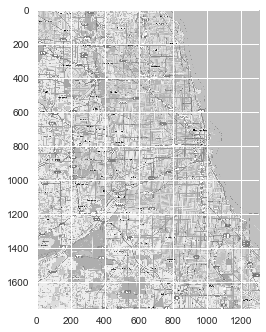

In [3]:
# https://www.kaggle.com/dchudz/show-map-image-in-python
# bounding box of this map:
# #    ll.lat ll.lon ur.lat ur.lon
# #    41.6    -88   42.1  -87.5

mapdata = np.loadtxt("data_wnv/mapdata_copyright_openstreetmap_contributors.txt")
plt.imshow(mapdata, cmap = plt.get_cmap('gray'))
plt.savefig('map.jpg')

In [ ]:
df_train.describe()

In [ ]:
df_train.head(5)

In [ ]:
# def eda(dataframe):
#     print "missing values \n", dataframe.isnull().sum()
#     print "dataframe index \n", dataframe.index
#     print "dataframe types \n", dataframe.dtypes
#     print "dataframe shape \n", dataframe.shape
#     print "dataframe describe \n", dataframe.describe()
#     for item in dataframe:
#         print item
#         print dataframe[item].nunique()

# eda(df_train)

In [ ]:
df_spray.describe()

In [ ]:
df_weather.describe()

In [ ]:
list(df_weather)

In [ ]:
df_weather.PrecipTotal.head(10)

In [ ]:
df_weather.head(10)

In [ ]:
df_train.describe()

In [6]:
## COMPARING TYPES OF SPECIES IN TRAIN AND TEST SETS

df_train.Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [7]:
## COMPARING TYPES OF SPECIES IN TRAIN AND TEST SETS

df_test.Species.unique()

## UNSPECIFIED CULEX IS ONLY IN TEST SET

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [8]:
## PRINTING ONLY NEW SPECIES IN TEST

df_test.loc[df_test['Species'] == 'UNSPECIFIED CULEX']

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
6,7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",UNSPECIFIED CULEX,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
14,15,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",UNSPECIFIED CULEX,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9
22,23,2008-06-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",UNSPECIFIED CULEX,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8
30,31,2008-06-11,"1500 West Webster Avenue, Chicago, IL 60614, USA",UNSPECIFIED CULEX,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8
38,39,2008-06-11,"2500 West Grand Avenue, Chicago, IL 60654, USA",UNSPECIFIED CULEX,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8
46,47,2008-06-11,"1100 Roosevelt Road, Chicago, IL 60608, USA",UNSPECIFIED CULEX,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8
54,55,2008-06-11,"1100 West Chicago Avenue, Chicago, IL 60642, USA",UNSPECIFIED CULEX,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8
62,63,2008-06-11,"2100 North Stave Street, Chicago, IL 60647, USA",UNSPECIFIED CULEX,21,N STAVE ST,T050,"2100 N STAVE ST, Chicago, IL",41.919343,-87.694259,8
70,71,2008-06-11,"2200 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,22,N CANNON DR,T054,"2200 N CANNON DR, Chicago, IL",41.921965,-87.632085,8
78,79,2008-06-11,"2200 West 113th Street, Chicago, IL 60643, USA",UNSPECIFIED CULEX,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8


In [ ]:
pd.concat([df_train.set_index('Trap'),df_train.set_index('Trap')], axis=1, join='inner')

In [ ]:
list(df_train_test)

In [ ]:
df_train_test.columns = ['Date_1', 'Address_1', 'Species_1', 'Block_1', 'Street_1', 'AddressNumberAndStreet_1', 'Latitude_1', 'Longitude_1', 'AddressAccuracy_1', 'NumMosquitos_1', 'WnvPresent_1', 'Date_2', 'Address_2', 'Species_2', 'Block_2', 'Street_2', 'AddressNumberAndStreet_2', 'Latitude_2', 'Longitude_2', 'AddressAccuracy_2', 'NumMosquitos_2', 'WnvPresent_2']

In [ ]:
df_train_test.head(100)

In [ ]:
df_train_weather.head(100)

In [ ]:
## CORRELATION BETWEEN WNV PRESENCE IN TRAIN DATA SET AND WNV PRESENCE IN TEST DATA SET

X1 = pd.DataFrame(df_train_test['WnvPresent_1'])
y = pd.DataFrame(df_train_test['WnvPresent_2'])

## FIND BETA
lm = linear_model.LinearRegression()
model = lm.fit(X1,y)

## RETURN BETA
model.coef_

In [ ]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

predictions = lm.predict(X1)
print(predictions)[0:5]

In [ ]:
scores = cross_val_score(model, X1, y, cv=6)
print 'Cross-validated scores:', scores

In [ ]:
## CORRELATION BETWEEN WNV PRESENCE IN TRAIN DATA SET AND WNV PRESENCE IN TEST DATA SET

X1 = pd.DataFrame(df_train_test['NumMosquitos_1'])
y = pd.DataFrame(df_train_test['NumMosquitos_2'])

## FIND BETA
lm = linear_model.LinearRegression()
model = lm.fit(X1,y)

## RETURN BETA
model.coef_

In [ ]:
scores = cross_val_score(model, X1, y, cv=6)
print 'Cross-validated scores:', scores

In [ ]:
# ‘bar’ or ‘barh’ for bar plots
# ‘hist’ for histogram
# ‘box’ for boxplot
# ‘kde’ or 'density' for density plots
# ‘area’ for area plots
# ‘scatter’ for scatter plots
# ‘hexbin’ for hexagonal bin plots
# ‘pie’ for pie plots

In [ ]:
df_train_test.plot(kind = 'scatter', x ='NumMosquitos_1',y ='NumMosquitos_2')

In [ ]:
df_train_test.groupby(['NumMosquitos_1'])['WnvPresent_1'].mean().plot.bar()

In [ ]:
df_train_test.plot(kind = 'scatter', x ='NumMosquitos_1',y ='Latitude_1')

In [ ]:
df_train_test.plot(kind = 'scatter', x ='NumMosquitos_1',y ='Longitude_1')

In [ ]:
list(df_train_test)

In [ ]:
df_train_weather.groupby(['NumMosquitos'])['DewPoint'].mean().plot.bar()

In [ ]:
df_train_weather.groupby(['NumMosquitos'])['DewPoint'].mean().plot.line()

In [ ]:
list(df_train_weather)

In [ ]:
df_train_weather.head(10)

In [ ]:
# NOT WORKING
# df_train_weather.groupby(['WnvPresent'])['PrecipTotal'].mean().plot.bar()

In [ ]:
# NOT WORKING
# df_train_weather.groupby(['NumMosquitos'])['SeaLevel'].mean().plot.scatter()